# Analysis of Gaussian Mixture Models 

This notebook shows examples and usage of the biokit.stats.module. 

The **mixture** module provides tools to create mixture models (gaussian) and to estimate the parameters of the GMM using either minimization or Expectation Minimization. 

We also provide examples to show how to automatically estimate the number of GMMs and limitations of such methods. 

In [14]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.dpi'] = 120
matplotlib.style.use('ggplot')
from biokit.stats import mixture

Populating the interactive namespace from numpy and matplotlib


### gaussian mixture model

In [39]:
m = mixture.GaussianMixture(mu=[-2, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=60)

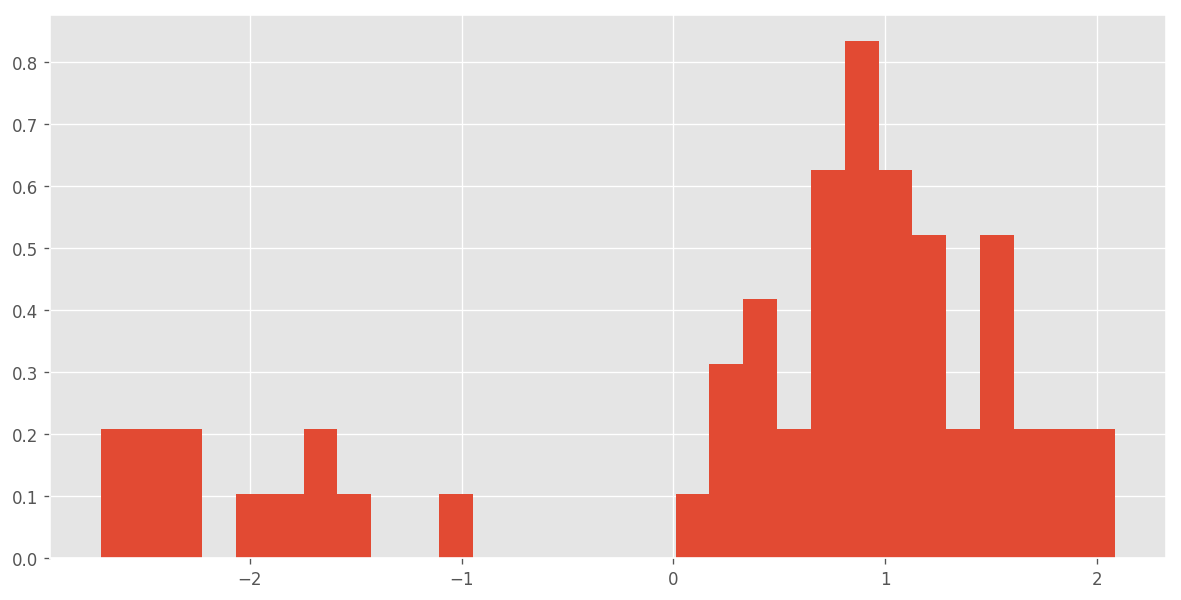

In [40]:
# data is stored in m.data and an histogram can easily be shown:
m.hist()

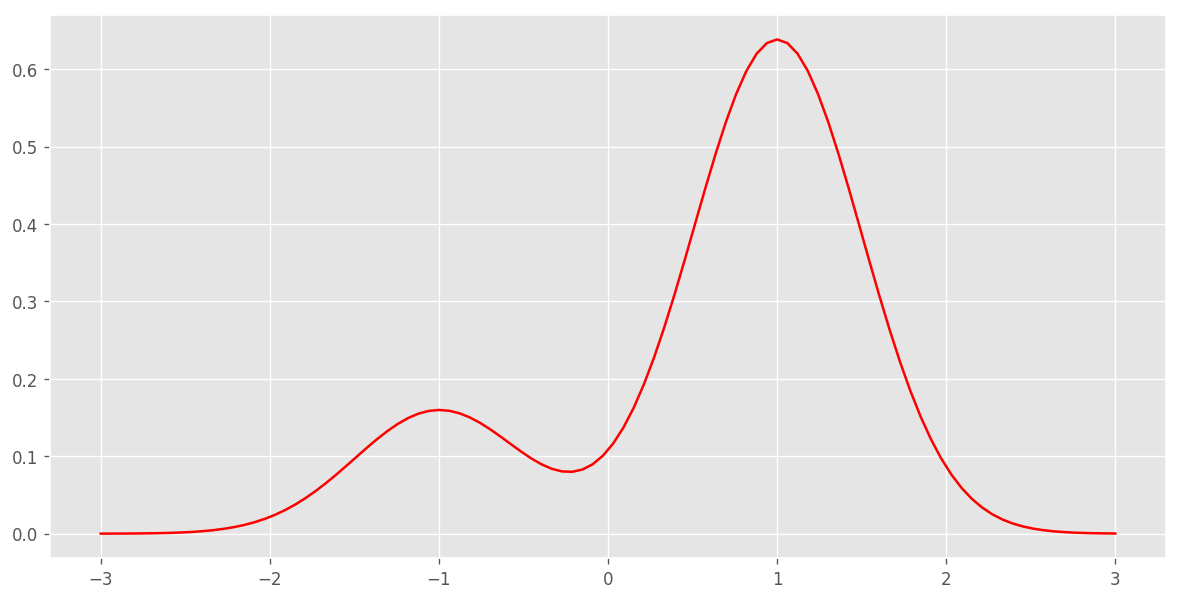

In [43]:
# In order to figure out the underlying parameters of the distribution
# given in the above sample, we will first use the GaussianMixtureFitting 
# class, which minimizes the  distribution of the data to a mixture 
# of gaussian model. A conveninet class to generate the data is the
# GaussianMixtureModel class, which can be used to plot the final distribution:
gmm = mixture.GaussianMixtureModel(k=2)

X = linspace(-3,3,100)
plot(X, gmm.pdf(X, params=[-1,0.5,0.2,1,0.5,0.8]), 'r')

### Gaussian Mixture model Fitting (minimization)

In [45]:
# now, let us use the following class to figure out the parameters of the
# gaussian models. We have to provide the number of models defined by 
# the k=2 parameter
mf = mixture.GaussianMixtureFitting(m.data, k=2)

In [46]:
#
mf.estimate()

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: divide by zero encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


            AIC: 146.07842975655115
           AICc: 146.28895607234062
            BIC: 6.51293499162551
  final_simplex: (array([[-2.06281758,  0.48815129,  0.17021508,  1.02983023,  0.47751144,
         0.68118111],
       [-2.06288833,  0.48808766,  0.17021926,  1.02984043,  0.47751624,
         0.68115473],
       [-2.06278304,  0.48809234,  0.17023523,  1.02983906,  0.47752063,
         0.68115528],
       [-2.06279041,  0.48812148,  0.17019952,  1.02983083,  0.47748639,
         0.68116208],
       [-2.06283523,  0.48808799,  0.1701766 ,  1.02989887,  0.47754693,
         0.68115478],
       [-2.06286197,  0.48818352,  0.17026765,  1.0298745 ,  0.47752494,
         0.68120343],
       [-2.06281222,  0.48810014,  0.17020716,  1.02980221,  0.47755652,
         0.68113116]]), array([ 71.03921488,  71.03921489,  71.03921491,  71.03921508,
        71.03921521,  71.03921522,  71.03921546]))
            fun: 71.039214878275573
 log_likelihood: 71.039214878275573
        message: 'Optim

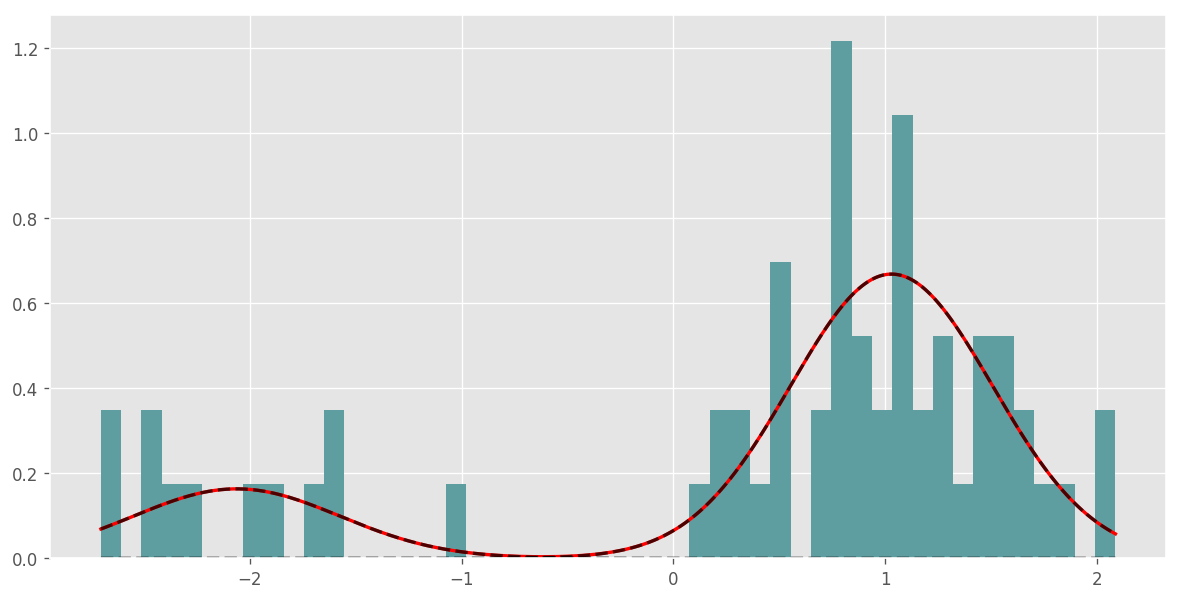

In [47]:
mf.plot()

### Expectation Minimization

Another method to estimate the parameters is to use an Expectation
Minimization algorithm

In [48]:
em = mixture.EM(m.data, model=gmm)

In [49]:
em.estimate()

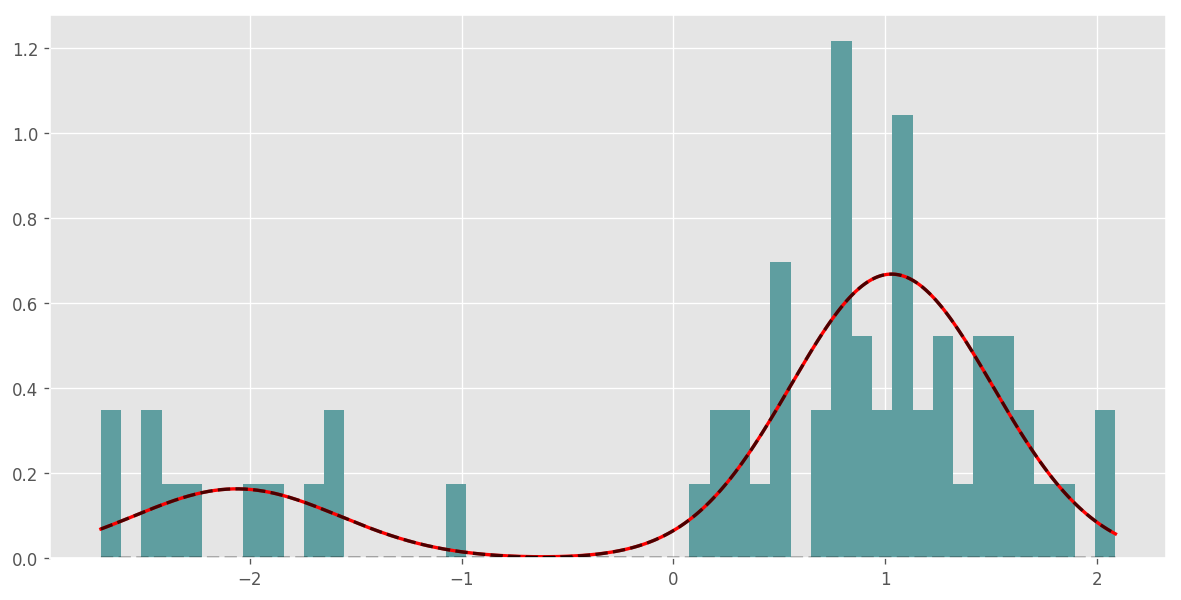

In [50]:
em.plot()

In [24]:
em.results.mus

[-2.116222207350738, 1.0632166937039789]

In [25]:
# to compare to numerical values found with the GaussianMixtureFitting 
mf.results.mus

[-2.116226577178983, 1.0631934341156952]

### How EM and minimization compare in terms of parameter estimation

Is the EM better than MixtureFitting class (scipy minimisation) ?

We can check that by generating N simulated data sets for some parameters

In [51]:
res_mf = []; res_em = []
N = 50
from easydev import Progress
replicates = 100
p = Progress(replicates)

mus = [-2,1]
sigmas = [0.5,0.5]
pis= [.2,0.8]
for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=mus, sigma=sigmas, mixture=pis, N=N)
    mf = mixture.GaussianMixtureFitting(m.data)
    mf.estimate(guess=[-.8,0.5,0.5,.8,0.5,0.5])
    res_mf.append(mf.results)
    
    em = mixture.EM(m.data, model=gmm)
    em.estimate(guess=[-.8, 0.5, 0.5, .8, 0.5, 0.5])
    res_em.append(em.results)
    p.animate(i+1)
    
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: divide by zero encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

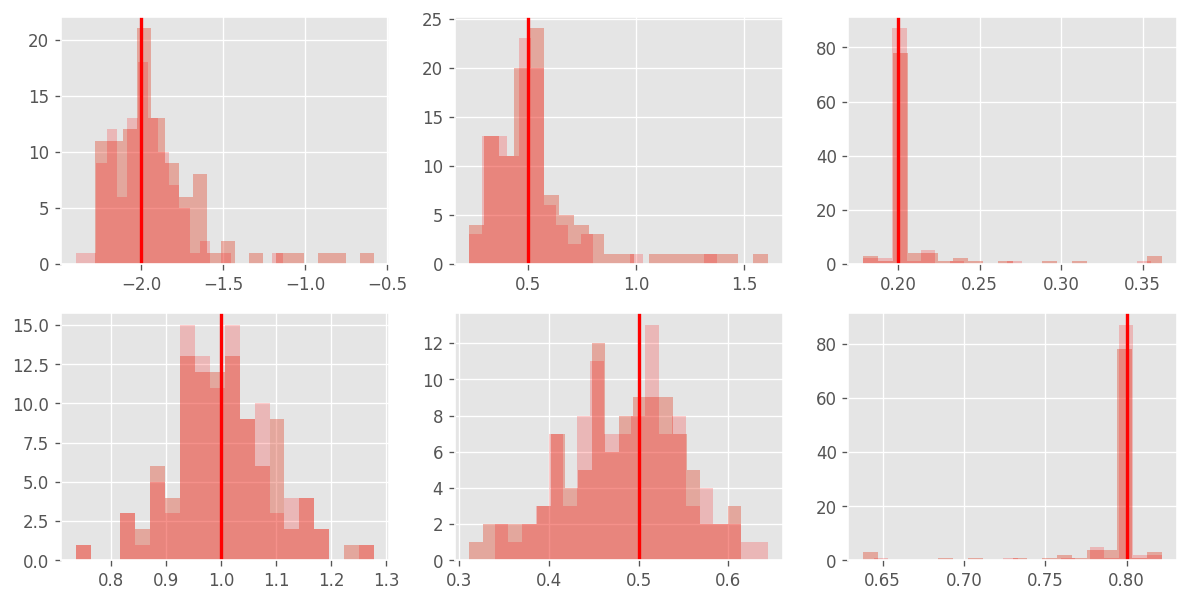

In [52]:
subplot(2,3,1)
hist([x.mus[0] for x in res_mf], 20, alpha=0.4);
hist([x.mus[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[0], color='r', lw=2)

subplot(2,3,2)
hist([x.sigmas[0] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[0], color='r', lw=2)

subplot(2,3,3)
hist([x.pis[0] for x in res_mf], 20, alpha=0.4);
hist([x.pis[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[0], color='r', lw=2)

subplot(2,3,4)
hist([x.mus[1] for x in res_mf], 20, alpha=0.4);
hist([x.mus[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[1], color='r', lw=2)

subplot(2,3,5)
hist([x.sigmas[1] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[1], color='r', lw=2)

subplot(2,3,6)
hist([x.pis[1] for x in res_mf], 20, alpha=0.4);
hist([x.pis[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[1], color='r', lw=2)


Performace are quite similar on this example, but this may not always be the case !

### Adaptive Estimation of required number of models

In [53]:
m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=60)

In [54]:
# if we know that k=2, it is easy to estimate the parameters
res = mf.estimate(k=2)

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: divide by zero encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


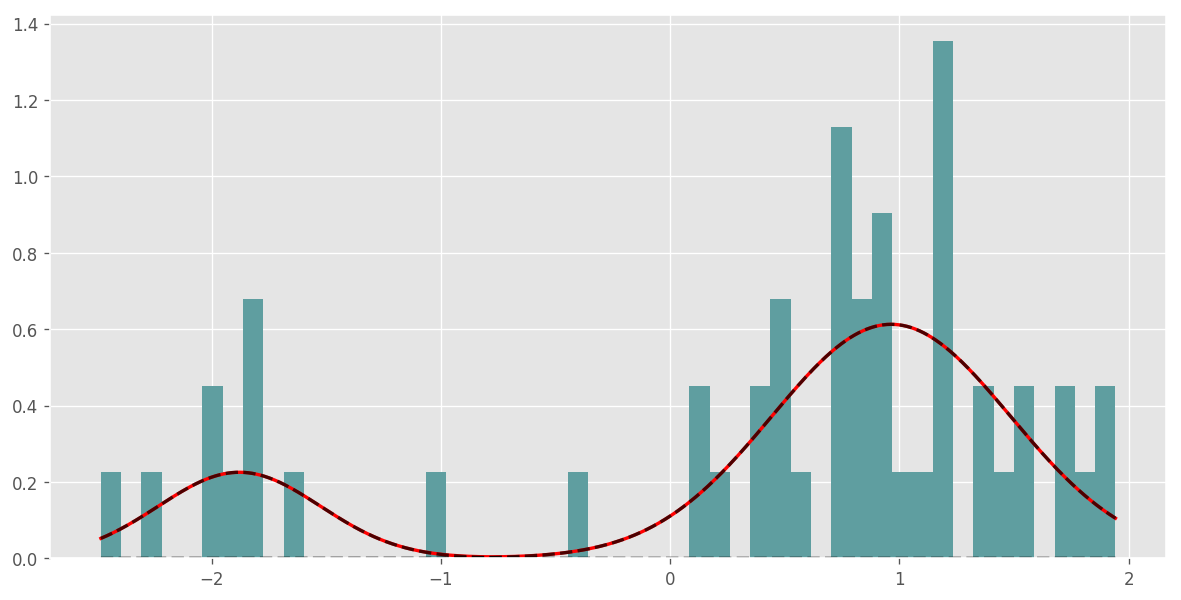

In [55]:
mf.plot()

### What about automatic inference of k ?

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: divide by zero encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


Found min  133.56248068 for k   4


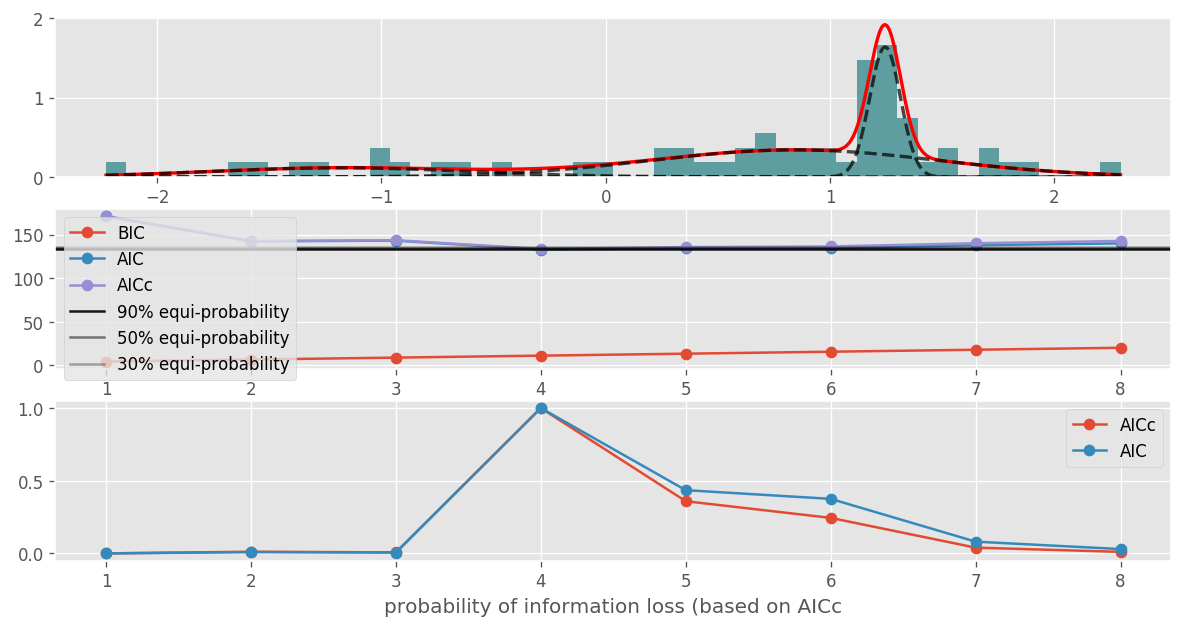

In [56]:
amf = mixture.AdaptativeMixtureFitting(m.data)
amf.diagnostic(kmin=1, kmax=8)

The proposed/optimal k in terms of Aikike is k=4, which is 
not correct.

What about using EM ?

In [57]:
amf.fitting = mixture.EM(m.data)

In [60]:
amf.run(kmin=1, kmax=8)

/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/mlab.py:1545: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/mlab.py:1545: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


issue arised at iteration 51
Found min  129.897177985 for k   3


/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/mlab.py:1545: RuntimeWarning: divide by zero encountered in double_scalars
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)
/home/cokelaer/miniconda3/envs/py3/lib/python3.5/site-packages/matplotlib/mlab.py:1545: RuntimeWarning: invalid value encountered in multiply
  return 1./(np.sqrt(2*np.pi)*sigma)*np.exp(-0.5 * (1./sigma*(x - mu))**2)


issue arised at iteration 51
Found min  129.897177985 for k   3


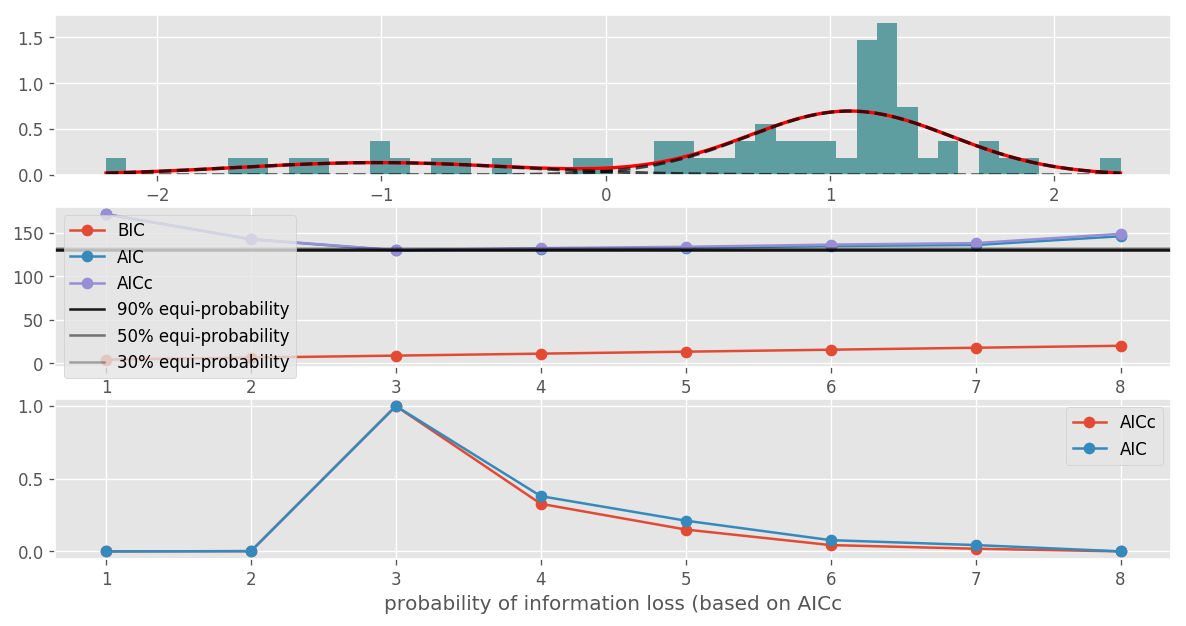

In [61]:
amf.diagnostic(k=2)

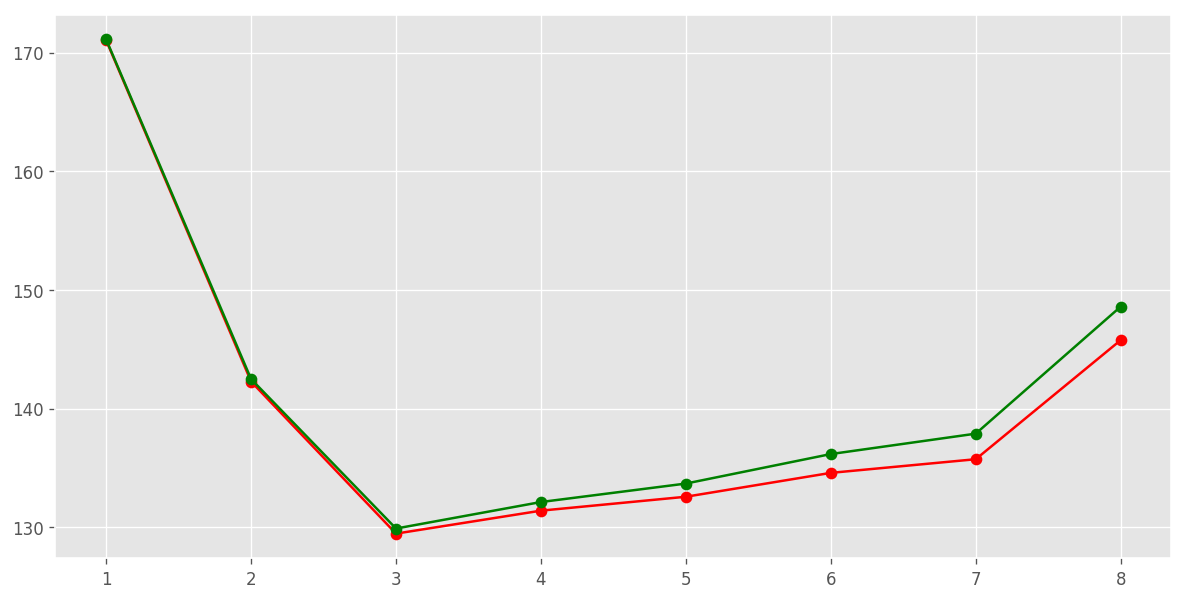

In [62]:
plot(amf.x[0:8], [amf.all_results[i]['AIC'] for i in amf.x[0:8]], 'or-')
plot(amf.x[0:8], [amf.all_results[i]['AICc'] for i in amf.x[0:8]], 'og-')

Now the question is how reliable is this estimation of k on 100 experiments ?

In [63]:

bestk_em = []
aics_em = []

bestk_m = []
aics_m = []

replicates = 100
p = Progress(replicates)

for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=1000)
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.fitting = mixture.EM(m.data)
    amf.run()
    bestk_em.append(amf.best_k)
    aics_em.append(amf.fitting.results.AIC)
    
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.run()
    bestk_m.append(amf.best_k)
    aics_m.append(amf.fitting.results.AIC)
    
    p.animate(i+1)

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: divide by zero encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:182: RuntimeWarning: invalid value encountered in log
  res =  -1 * pylab.log(self.pdf(sample, params)).sum()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

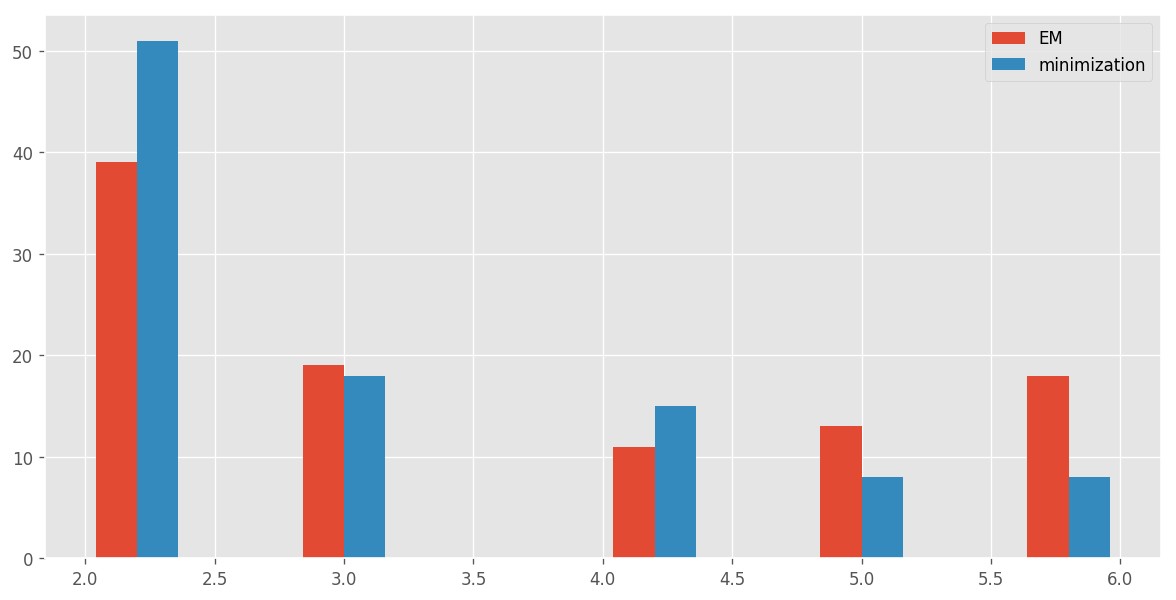

In [64]:
res = hist([bestk_em, bestk_m])
legend(['EM', 'minimization'])

([array([  3.,   8.,   8.,  18.,  19.,  17.,  12.,   9.,   5.,   1.]),
  array([  3.,   8.,   8.,  16.,  19.,  17.,  12.,  12.,   4.,   1.])],
 array([ 2279.94382331,  2297.60535058,  2315.26687784,  2332.92840511,
         2350.58993237,  2368.25145964,  2385.91298691,  2403.57451417,
         2421.23604144,  2438.89756871,  2456.55909597]),
 <a list of 2 Lists of Patches objects>)

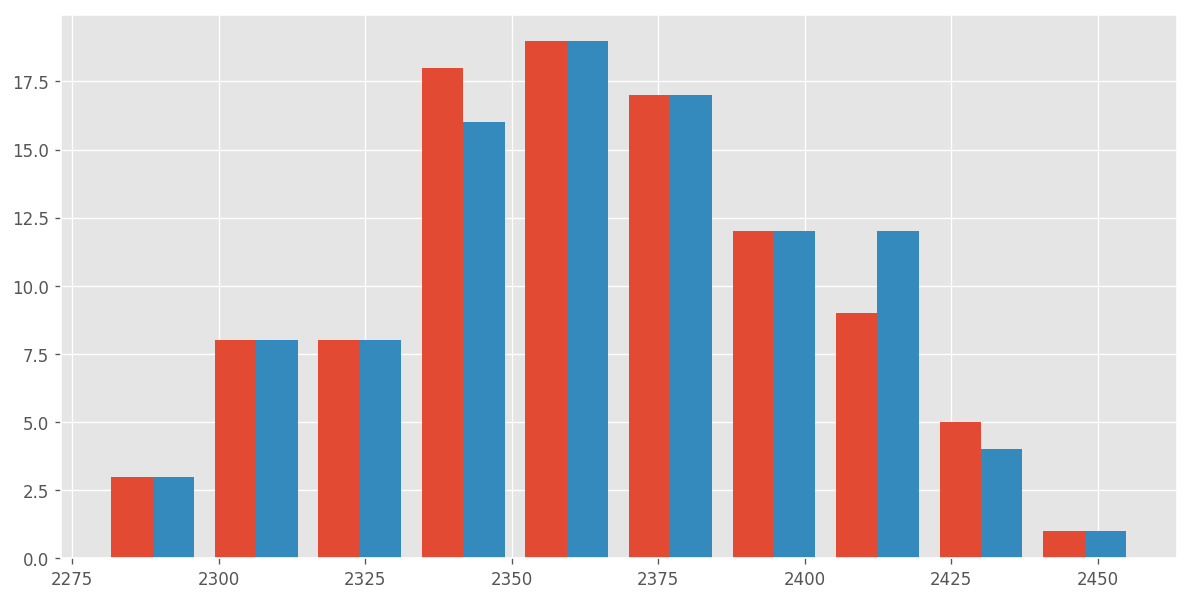

In [65]:
hist([aics_em, aics_m])


### Conclusions

When N = 60, the adaptative EM or Minimization methods do not allow the 
recovery of k automaticaly. You need more data e.g. ~ 1000 points